## Basic Neural Network Model: Predict Housing Price

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

<p align='center'>
  <img src='https://d1e00ek4ebabms.cloudfront.net/production/bc077356-7727-449a-8656-3e74b33fa65e.jpg' width=600></img>
</p>

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT - \% lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

Research Question: What is the price of a house given its information about the above features? In other words, can we build a model to learn from the features of the house to predict the housing price?

In [ ]:
# import 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# get data
train_path = '/content/sample_data/california_housing_train.csv'
test_path = '/content/sample_data/california_housing_test.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
# display shape
train.shape, test.shape

((17000, 9), (3000, 9))

In [ ]:
# head
train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [ ]:
# define X and y
X_train = train.iloc[:, train.columns!='median_house_value']
y_train = train['median_house_value']
X_test = test.iloc[:, test.columns!='median_house_value']
y_test = test['median_house_value']

In [ ]:
# display shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

In [ ]:
# import
import tensorflow as tf

In [ ]:
# define a neural network model
model = tf.keras.models.Sequential(name='this_model')
model.add(tf.keras.layers.Dense(1, input_shape=[8]))
model.summary()

Model: "this_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(optimizer='rmsprop', loss='mae')

In [ ]:
# fit
model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
425/425 [==============================] - 1s 2ms/step - loss: 195841.5000 - val_loss: 243842.9688
Epoch 2/10
425/425 [==============================] - 1s 2ms/step - loss: 193572.5000 - val_loss: 241790.8750
Epoch 3/10
425/425 [==============================] - 1s 2ms/step - loss: 191301.0781 - val_loss: 239737.4844
Epoch 4/10
425/425 [==============================] - 1s 2ms/step - loss: 189027.2188 - val_loss: 237688.4844
Epoch 5/10
425/425 [==============================] - 1s 2ms/step - loss: 186761.6562 - val_loss: 235645.4844
Epoch 6/10
425/425 [==============================] - 1s 2ms/step - loss: 184499.1094 - val_loss: 233590.5938
Epoch 7/10
425/425 [==============================] - 1s 2ms/step - loss: 182234.2656 - val_loss: 231542.2656
Epoch 8/10
425/425 [==============================] - 1s 2ms/step - loss: 179985.0000 - val_loss: 229499.3281
Epoch 9/10
425/425 [==============================] - 1s 2ms/step - loss: 177745.3125 - val_loss: 227446.9219
Epoch 10/1

In [ ]:
# predict on test set
y_test_pred_ = model.predict(X_test)
len(y_test_pred_), len(y_test)

(3000, 3000)

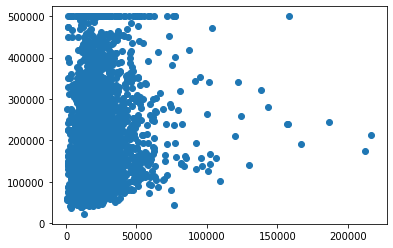

In [ ]:
# visualize
plt.scatter(y_test_pred_, y_test)

In [ ]:
# how accurate?
# step 1: take the difference
y_test_pred_.reshape((-1)) - np.asarray(y_test)

array([-314737.83398438, -163136.90332031, -243356.75976562, ...,
        -52517.1171875 , -160962.57580566, -485953.87304688])

In [ ]:
# step 2: take the absolute value of the difference
np.abs(y_test_pred_.reshape((-1)) - np.asarray(y_test))

array([314737.83398438, 163136.90332031, 243356.75976562, ...,
        52517.1171875 , 160962.57580566, 485953.87304688])

In [ ]:
# sttep 3: take the average of the absolute difference
np.mean(np.abs(y_test_pred_.reshape((-1)) - np.asarray(y_test)))

183469.61345070394

### Question: 
- How do you interpret this number?
- Why can't we compute accuracy but we have to use errors to measure how "accurate" our model is?

### Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also one of the main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple neural network you can change the number of layers drastically, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do we know what combination of hyperparameters is the best for your task?

One option is to try many different combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross validation). 

In [ ]:
# define model
def build_model(hidden=[128, 64], learning_rate=0.001, input_shape=[8]):
    model = tf.keras.models.Sequential()

    # What type of API are we using for input layer?
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

    # What type of API are we using for hidden layer?
    for unit in hidden:
        if hidden == 0:
            break
        else:
            model.add(tf.keras.layers.Dense(unit, activation="relu"))

    # Why do we set number of neurons (or units) to be 1 for this following layer?
    model.add(tf.keras.layers.Dense(1, activation="relu"))

    # A gentle reminder question: What is the difference between 
    # stochastic gradient descent and gradient descent?
    optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

    # Another gentle reminder question: Why do we use mse or mean squared error？
    model.compile(loss="mae", optimizer=optimizer)

    return model

Recall in Week 2 we introduced linear regression. In the code walk through, we used Sci-kit Learn library to import *LinearRegression()* function and we were able to fit the data using the *.fit()* method. 

This is the code we used in Week 2. 

```
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package 
lm.fit(X_train, y_train) # trains model using training x and y
```

Now we want to design a pipeline such that the entire *Tensorflow* objects can be thrown into the Sci-kit Learn framework. This is because Sci-kit Learn library provides nice cross-validation function and we want to take advantage of that function. 

To achieve this goal, we introduce a wrapper method. The syntax is *.wrappers* under Tensorflow Keras.

In [ ]:
# create a KerasRegressor based on the model defined above
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

# comment:
# The KerasRegressor object is a think wrapper around the Keras model 
# built using build_model(). Since we did not specify any hyperparameters 
# when creating it, it will use the default hyperparameters we defined in 
# build_model(). This makes things convenient because we can now use 
# this object just like a regular Scikit-learn regressor. 
# In other words, we can use .fit(), .predict(), and all these concepts
# consistently as we discussed before.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
# fit the model
keras_reg.fit(
    X_train, y_train, epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)] )

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


532/532 [==============================] - 2s 2ms/step - loss: 132300960.0000 - val_loss: 205624.0625
Epoch 2/50
532/532 [==============================] - 1s 2ms/step - loss: 206862.3438 - val_loss: 205108.2500
Epoch 3/50
532/532 [==============================] - 1s 2ms/step - loss: 205972.9531 - val_loss: 203677.3906
Epoch 4/50
532/532 [==============================] - 1s 2ms/step - loss: 203436.4375 - val_loss: 199555.5625
Epoch 5/50
532/532 [==============================] - 1s 2ms/step - loss: 196104.1719 - val_loss: 187627.6406
Epoch 6/50
532/532 [==============================] - 1s 2ms/step - loss: 174946.6094 - val_loss: 153468.6562
Epoch 7/50
532/532 [==============================] - 1s 2ms/step - loss: 128164.2734 - val_loss: 102765.0156
Epoch 8/50
532/532 [==============================] - 1s 2ms/step - loss: 94775.6094 - val_loss: 87365.8906
Epoch 9/50
532/532 [==============================] - 1s 2ms/step - loss: 89134.4062 - val_loss: 86603.9062
Epoch 10/50
532/532 [=

In [ ]:
# prediction on test set
y_test_pred = keras_reg.predict(X_test)

In [ ]:
# mean square error on test set
import numpy as np
rmse_test = (np.sum((y_test_pred - y_test) ** 2) / len(y_test)) ** 0.5
rmse_test 

# Question: how to interpret this?

# Answer: On the test set (observations the model has not seen before)
#         the educated guess from the model make predictions with error 
#         range to be about 

115941.21117090923

Note that any extra parameter you pass to the *fit()* method will get passed to the underlying Keras model. Also note that the score will be the oppositie of the MSE because Scikit-Learn wants scores, not losses (i.e. higher should be better).

We do not want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one perfoms best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search.

In [ ]:
# library
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# param range
param_distribs = {
    "hidden": [
            [1024], [512], [256], [0]
        ],
    "learning_rate": reciprocal(3e-4, 3e-2)
}

In [ ]:
# create randomized grid search
rnd_search_cv = RandomizedSearchCV(
    keras_reg, param_distributions=param_distribs,
    n_iter=10, cv=3)

In [ ]:
# fit the above randomized grid search function
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_test, y_test),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Go get a cup of a coffee! This may take a few minutes.

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 237582.6094 - val_loss: 205845.4844
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 231500.2188 - val_loss: 205845.0625
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 218899.9062 - val_loss: 205844.6719
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 211165.2812 - val_loss: 205844.0156
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 213300.0469 - val_loss: 205843.3125
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 218874.5938 - val_loss: 205842.9219
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 213501.7031 - val_loss: 205842.4375
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 212584.1562 - val_loss: 205841.7969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 211544.1719 - val_loss: 205841.1250
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 246433.6406 - val_loss: 205845.2969
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 226244.0781 - val_loss: 205844.4375
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 221481.7031 - val_loss: 205842.7500
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 221907.9062 - val_loss: 205828.6562
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 212010.6406 - val_loss: 205853.1250
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 215193.5312 - val_loss: 205842.9062
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 210360.8906 - val_loss: 205842.6094
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 216658.4062 - val_loss: 205841.9844
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 209602.7344 - val_loss: 205841.4062
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 257230.0625 - val_loss: 205845.3125
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 205912.7969 - val_loss: 205845.5469
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 217551.2500 - val_loss: 205844.5625
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 210368.4688 - val_loss: 205844.0156
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 216092.8906 - val_loss: 205843.3281
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 206238.4219 - val_loss: 205842.8594
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 209238.2812 - val_loss: 205842.3906
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 205117.7344 - val_loss: 205841.7969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 207652.6875 - val_loss: 159075.5156
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 1516367.5000 - val_loss: 205843.9219
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 483109.1250 - val_loss: 205841.2188
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 359128.4688 - val_loss: 205838.3125
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 256651.6250 - val_loss: 205835.2812
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 287621.6250 - val_loss: 205832.4688
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 214174.0781 - val_loss: 205829.2969
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 317995.9062 - val_loss: 205826.1406
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 259414.6094 - val_loss: 205822.8281
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 211142.5781 - val_loss: 205819.2500
Epoch 10/50
355/355 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 1467854.1250 - val_loss: 205844.0156
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 438245.1562 - val_loss: 205841.2188
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 253992.8594 - val_loss: 205838.2969
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 301561.8438 - val_loss: 205835.3438
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 297973.8750 - val_loss: 205832.4219
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 281131.2500 - val_loss: 205829.4688
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 246082.9375 - val_loss: 205826.5156
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 243307.6875 - val_loss: 205823.5156
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 216448.1406 - val_loss: 205820.5000
Epoch 10/50
355/355 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 1464117.3750 - val_loss: 205843.5625
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 590912.8125 - val_loss: 205841.2812
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 368918.9375 - val_loss: 205836.0156
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 300779.6250 - val_loss: 205835.5469
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 228991.5938 - val_loss: 205832.5469
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 258282.8438 - val_loss: 205829.4844
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 226369.2344 - val_loss: 205826.5625
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 262750.4688 - val_loss: 205823.3750
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 225953.0625 - val_loss: 205820.5625
Epoch 10/50
355/355 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 3357607.5000 - val_loss: 205842.0312
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 1432485.5000 - val_loss: 43681132.0000
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 694626.0625 - val_loss: 205831.4531
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 988098.1250 - val_loss: 205826.0938
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 243625.7344 - val_loss: 205820.4844
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 635512.1250 - val_loss: 205814.9688
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 467523.2812 - val_loss: 205809.4062
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 211127.6094 - val_loss: 205803.7969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 444146.4375 - val_loss: 205798.3438
Epoch 10/50
355/3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 4234043.0000 - val_loss: 205841.8594
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 1976882.0000 - val_loss: 205836.6562
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 578044.4375 - val_loss: 205831.3750
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 508017.7500 - val_loss: 205825.9688
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 420053.5000 - val_loss: 205820.5000
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 234737.3594 - val_loss: 205814.9062
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 209672.0469 - val_loss: 205809.4219
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 208786.7812 - val_loss: 205803.8125
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 273894.9375 - val_loss: 205798.2969
Epoch 10/50
355/355

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 3119097.5000 - val_loss: 205815.4688
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 1737903.5000 - val_loss: 205836.2031
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 954349.8125 - val_loss: 205831.4688
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 447508.5000 - val_loss: 205825.7500
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 540390.1875 - val_loss: 205820.5938
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 201635.4844 - val_loss: 205815.1094
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 201875.7344 - val_loss: 205809.4531
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 253989.0000 - val_loss: 205803.9062
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 248339.4219 - val_loss: 205798.3750
Epoch 10/50
355/355

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 3140708.5000 - val_loss: 205841.9688
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 1748305.1250 - val_loss: 29640472.0000
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 846390.3750 - val_loss: 205831.9375
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 356078.5000 - val_loss: 205826.6406
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 267533.7500 - val_loss: 205821.3750
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 211261.0625 - val_loss: 205816.0469
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 372254.1562 - val_loss: 205810.7656
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 290700.7812 - val_loss: 205805.5000
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 211123.6875 - val_loss: 205800.1719
Epoch 10/50
355/3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 4833376.0000 - val_loss: 205842.4062
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 1712729.7500 - val_loss: 205837.5938
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 684661.6250 - val_loss: 205832.5156
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 442523.0938 - val_loss: 205826.7656
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 487383.1562 - val_loss: 205822.1250
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 397081.8750 - val_loss: 205816.7656
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 208794.1406 - val_loss: 205811.3750
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 325074.7812 - val_loss: 205806.1875
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 217374.5625 - val_loss: 205800.7656
Epoch 10/50
355/355

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 2684635.7500 - val_loss: 205841.7344
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 665286.3750 - val_loss: 205836.8906
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 869036.7500 - val_loss: 205831.7031
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 555015.5625 - val_loss: 205826.5000
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 625287.3125 - val_loss: 205821.2969
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 330404.8750 - val_loss: 205815.9844
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 624999.4375 - val_loss: 205810.7344
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 314689.0625 - val_loss: 205805.4375
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 240001.3125 - val_loss: 639020.8750
Epoch 10/50
355/355 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 1109602.6250 - val_loss: 205842.2812
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 308233.6562 - val_loss: 205837.8906
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 364014.1562 - val_loss: 205833.3438
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 291185.5312 - val_loss: 205828.8906
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 385943.3750 - val_loss: 205824.4844
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 211143.0938 - val_loss: 205819.9219
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 216682.3750 - val_loss: 205815.4531
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 211134.0625 - val_loss: 205810.7344
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 212087.8125 - val_loss: 205805.8906
Epoch 10/50
355/355 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 1277576.3750 - val_loss: 205842.2344
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 443627.1562 - val_loss: 205837.8438
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 412120.8750 - val_loss: 205833.3906
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 208811.2500 - val_loss: 205828.8438
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 219313.5781 - val_loss: 205824.3438
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 208802.1250 - val_loss: 205819.8125
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 208797.6250 - val_loss: 205815.2812
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 219650.9844 - val_loss: 205810.7656
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 208788.6875 - val_loss: 205806.2969
Epoch 10/50
355/355 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 1084423.3750 - val_loss: 205842.2188
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 237436.6406 - val_loss: 205837.1406
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 318650.2812 - val_loss: 205833.2344
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 201894.5312 - val_loss: 205828.6875
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 201889.8281 - val_loss: 205824.2188
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 202387.0000 - val_loss: 205819.7188
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 201880.7969 - val_loss: 205815.1875
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 201876.3750 - val_loss: 205810.6094
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 201871.8125 - val_loss: 205806.1406
Epoch 10/50
355/355 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 211167.2656 - val_loss: 205846.2969
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1562 - val_loss: 205846.2969
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.2656 - val_loss: 205846.2969
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.2969 - val_loss: 205846.2969
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.2031 - val_loss: 205846.2969
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1719 - val_loss: 205846.2969
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1562 - val_loss: 205846.2969
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.2969 - val_loss: 205846.2969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.2500 - val_loss: 205846.2969
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 208826.2969 - val_loss: 205846.2969
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3750 - val_loss: 205846.2969
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.2969 - val_loss: 205846.2969
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3281 - val_loss: 205846.2969
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3594 - val_loss: 205846.2969
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.4062 - val_loss: 205846.2969
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3750 - val_loss: 205846.2969
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.2656 - val_loss: 205846.2969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.2969 - val_loss: 205846.2969
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 201909.7969 - val_loss: 205846.2969
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.6719 - val_loss: 205846.2969
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7188 - val_loss: 205846.2969
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7188 - val_loss: 205846.2969
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.6875 - val_loss: 205846.2969
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.6875 - val_loss: 205846.2969
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.6875 - val_loss: 205846.2969
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.8281 - val_loss: 205846.2969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7188 - val_loss: 205846.2969
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 153594.8281 - val_loss: 188502.8906
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 153296.7188 - val_loss: 107020.2656
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 152410.2031 - val_loss: 238839.7500
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 156202.6250 - val_loss: 106687.0625
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 149967.6094 - val_loss: 219938.0625
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 137958.0312 - val_loss: 144220.5156
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 131208.9219 - val_loss: 165227.4375
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 132973.2812 - val_loss: 130041.5859
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 134087.2500 - val_loss: 110736.7578
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 167436.6094 - val_loss: 153486.5938
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 168801.8750 - val_loss: 205837.0625
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 177833.7969 - val_loss: 205830.7812
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 170689.0625 - val_loss: 205951.3125
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 180156.2812 - val_loss: 147494.0156
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 167882.3438 - val_loss: 172812.4375
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 162031.0781 - val_loss: 205842.6406
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 176912.2812 - val_loss: 105908.1406
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 176251.2969 - val_loss: 111419.6406
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 156957.2500 - val_loss: 114589.7500
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 154529.1719 - val_loss: 247103.3125
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 156061.2656 - val_loss: 113268.0312
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 149786.5156 - val_loss: 114335.9766
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 157203.7031 - val_loss: 120807.4062
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 161168.9375 - val_loss: 203423.7656
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 152711.7188 - val_loss: 122087.3359
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 149892.7344 - val_loss: 126174.3047
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 139725.3594 - val_loss: 124621.1719
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 144431.4375 - val_loss: 160976.1250
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 138904.1719 - val_loss: 106174.6328
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 135530.0156 - val_loss: 113321.3750
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 136290.3906 - val_loss: 665648.1875
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 132486.3438 - val_loss: 98022.4609
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 129526.0234 - val_loss: 112439.2109
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 118621.1328 - val_loss: 94299.5703
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 124629.1172 - val_loss: 177585.4062
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 122437.3594 - val_loss: 184859.7188
Epoch 10/50
355/355 [==

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 149254.5938 - val_loss: 115679.9375
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 144701.6094 - val_loss: 205825.3438
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 151601.0781 - val_loss: 103374.4766
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 149745.9219 - val_loss: 144256.8750
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 148344.8438 - val_loss: 192651.6250
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 152711.0625 - val_loss: 124491.8281
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 150486.9219 - val_loss: 192637.0156
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 152274.7656 - val_loss: 96286.0625
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 145541.0781 - val_loss: 166877.7500
Epoch 10/50
355/355 [=

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 142450.0000 - val_loss: 113081.7734
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 145738.7500 - val_loss: 205232.3906
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 143243.0156 - val_loss: 110075.9766
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 140060.9688 - val_loss: 100608.8750
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 134262.0000 - val_loss: 481347.4062
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 132657.9531 - val_loss: 192178.9062
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 126121.4375 - val_loss: 119292.2969
Epoch 8/50
355/355 [==============================] - 1s 3ms/step - loss: 123145.1250 - val_loss: 94877.0000
Epoch 9/50
355/355 [==============================] - 1s 4ms/step - loss: 123389.5078 - val_loss: 85963.2344
Epoch 10/50
355/355 [==

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 211167.2188 - val_loss: 205846.2969
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1719 - val_loss: 205846.2969
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.2500 - val_loss: 205846.2969
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1094 - val_loss: 205846.2969
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1094 - val_loss: 205846.2969
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.0938 - val_loss: 205846.2969
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1562 - val_loss: 205846.2969
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.1562 - val_loss: 205846.2969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 211167.2031 - val_loss: 205846.2969
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 208826.4062 - val_loss: 205846.2969
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3750 - val_loss: 205846.2969
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3750 - val_loss: 205846.2969
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3750 - val_loss: 205846.2969
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3125 - val_loss: 205846.2969
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.2031 - val_loss: 205846.2969
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3281 - val_loss: 205846.2969
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.3281 - val_loss: 205846.2969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 208826.4062 - val_loss: 205846.2969
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 2ms/step - loss: 201909.7500 - val_loss: 205846.2969
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7812 - val_loss: 205846.2969
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.6250 - val_loss: 205846.2969
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7188 - val_loss: 205846.2969
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7344 - val_loss: 205846.2969
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.6406 - val_loss: 205846.2969
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.6875 - val_loss: 205846.2969
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7500 - val_loss: 205846.2969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 201909.7344 - val_loss: 205846.2969
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 2s 3ms/step - loss: 205362.0156 - val_loss: 205837.9062
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 205392.2969 - val_loss: 205846.8281
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 207378.2344 - val_loss: 116101.6016
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 207330.7969 - val_loss: 205846.4844
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 209415.0469 - val_loss: 205846.0312
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 207438.7969 - val_loss: 205846.5000
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 210279.2969 - val_loss: 205845.9375
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 210438.8906 - val_loss: 205845.4219
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 211128.8750 - val_loss: 205844.8906
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 199218.6875 - val_loss: 381207.9375
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 209863.3750 - val_loss: 205846.9375
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 208125.7031 - val_loss: 205846.0625
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 205072.6406 - val_loss: 205846.7812
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 208049.8594 - val_loss: 205846.4375
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 208436.4531 - val_loss: 205844.9688
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 207713.5000 - val_loss: 205845.1250
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 206297.2344 - val_loss: 205843.9844
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 209232.1250 - val_loss: 205843.0469
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


355/355 [==============================] - 1s 3ms/step - loss: 202619.7812 - val_loss: 119854.6953
Epoch 2/50
355/355 [==============================] - 1s 2ms/step - loss: 200960.6719 - val_loss: 205846.7344
Epoch 3/50
355/355 [==============================] - 1s 2ms/step - loss: 201401.0781 - val_loss: 205846.0938
Epoch 4/50
355/355 [==============================] - 1s 2ms/step - loss: 200626.2031 - val_loss: 205845.7969
Epoch 5/50
355/355 [==============================] - 1s 2ms/step - loss: 199999.5312 - val_loss: 205845.5469
Epoch 6/50
355/355 [==============================] - 1s 2ms/step - loss: 200676.0781 - val_loss: 205845.1406
Epoch 7/50
355/355 [==============================] - 1s 2ms/step - loss: 201318.4062 - val_loss: 205844.7500
Epoch 8/50
355/355 [==============================] - 1s 2ms/step - loss: 201106.6406 - val_loss: 205845.2969
Epoch 9/50
355/355 [==============================] - 1s 2ms/step - loss: 201939.8906 - val_loss: 205837.8906
Epoch 10/50
355/355 [

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


532/532 [==============================] - 1s 2ms/step - loss: 155486.7812 - val_loss: 205735.1875
Epoch 2/50
532/532 [==============================] - 1s 2ms/step - loss: 157843.1406 - val_loss: 149416.9688
Epoch 3/50
532/532 [==============================] - 1s 2ms/step - loss: 154383.1562 - val_loss: 113452.0547
Epoch 4/50
532/532 [==============================] - 1s 2ms/step - loss: 153642.4062 - val_loss: 123447.0703
Epoch 5/50
532/532 [==============================] - 1s 2ms/step - loss: 154132.9219 - val_loss: 194677.3281
Epoch 6/50
532/532 [==============================] - 1s 2ms/step - loss: 147059.8594 - val_loss: 138634.1250
Epoch 7/50
532/532 [==============================] - 1s 2ms/step - loss: 139234.1250 - val_loss: 94653.0312
Epoch 8/50
532/532 [==============================] - 1s 2ms/step - loss: 134626.0156 - val_loss: 173325.1250
Epoch 9/50
532/532 [==============================] - 1s 2ms/step - loss: 133141.2969 - val_loss: 256868.6875
Epoch 10/50
532/532 [=

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5244369850>,
                   param_distributions={'hidden': [[1024], [512], [256], [0]],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5245bc0bd0>})

In [ ]:
# after a long wait, we output the best parameters
rnd_search_cv.best_params_

{'hidden': [512], 'learning_rate': 0.00040060437860204754}

In [ ]:
# print the score too
rnd_search_cv.best_score_

-187757.5

In [ ]:
# extract the best model
best_model = rnd_search_cv.best_estimator_.model

Do a final evaluation.

In [ ]:
# best model prediction
y_hat_best_pred_ = best_model.predict(X_test)

In [ ]:
# display dimension
y_hat_best_pred_.shape

(3000, 1)

In [ ]:
# flatten
y_hat_best_pred_ = y_hat_best_pred_.reshape((-1))
y_hat_best_pred_.shape

(3000,)

In [ ]:
# result
rmse_test_best = (np.sum((y_hat_best_pred_ - y_test) ** 2) / len(y_test)) ** 0.5
rmse_test_best

128402.63124356557

In [ ]:
# save the model (this is optional)
# model.save("best_model_I_just_trained.h5")

# Remark:
# This is optional, but we write this remark so you are aware
# of this procedure. In practice, the models are big and complex
# enough that sometimes there are multiple teams develop the same
# model. In this case, it is often times a safe practice to save 
# your model by using model.save("GIVE_IT_A_NAME.h5"). The format
# must be h5 format, so please only change the name of the file.
# In Colab, after you run the model.save() code successfully, you 
# will be able to see this by navigating to "Content" using the left 
# menu bar. Go to the "folder" button and choose "Content".